2022/09/26
Objetivo:
* Calcular os ativos de maior impacto no Índice Bovespa


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
import seaborn as sns

In [3]:
!pip install pandas numpy
!pip install datetime
!pip install yfinance

In [4]:
import numpy as np
import yfinance as yf
from datetime import datetime
import pytz
import time

In [5]:
# Importar arquivo IBOV com todos os ativos que compôem o Índice Bovespa 
filename = 'IBOVDia_14-03-23_.csv'
Ativos = pd.read_csv(filename)
Ativos.head()

,Ativo
0,RRRP3
1,ALPA4
2,ABEV3
3,AMER3
4,ARZZ3


In [6]:
# Verificar tamanho do arquivo
Ativos.shape

(90, 1)

In [7]:
# Verificar tipos de dados do arquivo
Ativos.dtypes

Ativo    object
dtype: object

In [8]:
datetime.today()

datetime.datetime(2023, 7, 19, 13, 16, 32, 109607)

In [9]:
# Definir fuso horário padrão
timezone = pytz.timezone("America/sao_Paulo")

In [10]:
# Definir data início e fim da extração
Inicio = '2017-01-11'
Fim = datetime.today()

In [11]:
Fim

datetime.datetime(2023, 7, 19, 13, 16, 32, 926762)

In [12]:
Dados_RRRP3 = yf.download('RRRP3.SA', start = Inicio, end = Fim, period = '1d')

[*********************100%***********************]  1 of 1 completed


In [13]:
Dados_RRRP3[['Close','Volume']].head()

,Close,Volume
Date,,
2020-11-13 00:00:00-03:00,20.799999,470000
2020-11-16 00:00:00-03:00,21.000000,175800
2020-11-17 00:00:00-03:00,20.990000,256600
2020-11-18 00:00:00-03:00,20.900000,96600
2020-11-19 00:00:00-03:00,20.900000,84300


In [14]:
Dados_RRRP3.Volume.mean()

3738862.6656626505

In [15]:
ativo1 = 'PETR4'

In [16]:
ativo1 + '.SA'

'PETR4.SA'

In [17]:
# Criar um objeto lista "lista" com todos os itens da coluna "Ativo" do Data Frame "Ativos"
lista = list(Ativos.Ativo)

In [18]:
# Inserir ".SA" no final de cada item "Ativo" da lista e criar nova lista "lista_Ativos" com os itens já com ".SA"
lista_Ativos = []
for ativo in lista:
    ativosa = (ativo + '.SA')
    lista_Ativos.append(ativosa)

In [19]:
lista_Ativos

['RRRP3.SA',
 'ALPA4.SA',
 'ABEV3.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BPAN4.SA',
 'BBSE3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BPAC11.SA',
 'CRFB3.SA',
 'CCRO3.SA',
 'CMIG4.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CPFE3.SA',
 'CMIN3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENGI11.SA',
 'ENEV3.SA',
 'EGIE3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'NTCO3.SA',
 'SOMA3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'RENT3.SA',
 'LWSA3.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'CASH3.SA',
 'BEEF3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RAIL3.SA',
 'SBSP3.SA',
 'SANB11.SA',
 'SMTO3.SA',
 'CSNA3

In [20]:
# Importar base de dados Yahoo Finance com dados dos ativos listados em "lista_Ativos", importada apenas dados de "Volume"
Ativos_IBOV_volume = yf.download(lista_Ativos, start = Inicio, end = Fim, period = '1d')['Volume']

[*********************100%***********************]  90 of 90 completed


In [21]:
# Retirar os dados não existentes da base de dados criada acima "Ativos_IBOV_volume"
# Criar novo objeto "Ativos_IBOV_volume_dropna sem os dados não existentes"
Ativos_IBOV_volume_dropna = Ativos_IBOV_volume.dropna()

In [22]:
Ativos_IBOV_volume_dropna

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-22 00:00:00-03:00,26964000,2184400,5156200,747300,12046100.0,6390300.0,21141000,15693700,5676220,41808360,...,24411400,5727100,9229300,30122900,44693500,5630100.0,36943300,4186700,5763500,5662100
2021-11-23 00:00:00-03:00,29394600,2478900,5649800,1106100,3755200.0,7796000.0,44404300,16327900,8611130,41310170,...,8989100,7489900,7031900,30982000,30391600,8478100.0,32150600,2379100,8878900,3692400
2021-11-24 00:00:00-03:00,18485100,1965400,7625100,903500,5705900.0,11913100.0,24597700,13914100,7721010,37099150,...,6851400,5279100,8642900,33807000,20764100,10541400.0,36266200,2578700,6562700,2584200
2021-11-25 00:00:00-03:00,12150300,1206400,4249400,720900,5547700.0,6421700.0,14066600,24708300,6160990,17497370,...,8027800,1709700,5578300,14005100,17199200,5899600.0,31195700,1705400,4754200,1535700
2021-11-26 00:00:00-03:00,21060500,1472200,5658200,697900,6311300.0,20759100.0,20776900,13317500,5840890,43187100,...,5261100,2477800,5319700,26111400,22664200,6307300.0,33201800,2784800,6526100,3504900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 00:00:00-03:00,28789100,7388600,12502100,1436600,10770700.0,16093600.0,43151400,9558000,5107100,40277700,...,8490000,2694900,4366500,16547000,18579200,6648200.0,92546500,2322300,5783000,4133100
2023-07-07 00:00:00-03:00,18082900,7585000,14143600,1057000,12191300.0,11503100.0,47396100,11539600,3299900,21703000,...,6661800,2791100,9481100,13449300,57287600,9825900.0,57010200,1489600,4221200,4689200
2023-07-10 00:00:00-03:00,30024500,6143300,9856600,1121900,9043800.0,10041000.0,25239000,8903000,2555500,19191400,...,8847400,2082400,4898100,16496200,36698500,5369500.0,52757300,1208200,4546100,2231000


In [23]:
# Criar novo objeto "Ativos_IBOV_volume_mean" com os dados de "Ativos_IBOV_volume_dropna"
Ativos_IBOV_volume_mean = Ativos_IBOV_volume_dropna
Ativos_IBOV_volume_mean

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-22 00:00:00-03:00,26964000,2184400,5156200,747300,12046100.0,6390300.0,21141000,15693700,5676220,41808360,...,24411400,5727100,9229300,30122900,44693500,5630100.0,36943300,4186700,5763500,5662100
2021-11-23 00:00:00-03:00,29394600,2478900,5649800,1106100,3755200.0,7796000.0,44404300,16327900,8611130,41310170,...,8989100,7489900,7031900,30982000,30391600,8478100.0,32150600,2379100,8878900,3692400
2021-11-24 00:00:00-03:00,18485100,1965400,7625100,903500,5705900.0,11913100.0,24597700,13914100,7721010,37099150,...,6851400,5279100,8642900,33807000,20764100,10541400.0,36266200,2578700,6562700,2584200
2021-11-25 00:00:00-03:00,12150300,1206400,4249400,720900,5547700.0,6421700.0,14066600,24708300,6160990,17497370,...,8027800,1709700,5578300,14005100,17199200,5899600.0,31195700,1705400,4754200,1535700
2021-11-26 00:00:00-03:00,21060500,1472200,5658200,697900,6311300.0,20759100.0,20776900,13317500,5840890,43187100,...,5261100,2477800,5319700,26111400,22664200,6307300.0,33201800,2784800,6526100,3504900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 00:00:00-03:00,28789100,7388600,12502100,1436600,10770700.0,16093600.0,43151400,9558000,5107100,40277700,...,8490000,2694900,4366500,16547000,18579200,6648200.0,92546500,2322300,5783000,4133100
2023-07-07 00:00:00-03:00,18082900,7585000,14143600,1057000,12191300.0,11503100.0,47396100,11539600,3299900,21703000,...,6661800,2791100,9481100,13449300,57287600,9825900.0,57010200,1489600,4221200,4689200
2023-07-10 00:00:00-03:00,30024500,6143300,9856600,1121900,9043800.0,10041000.0,25239000,8903000,2555500,19191400,...,8847400,2082400,4898100,16496200,36698500,5369500.0,52757300,1208200,4546100,2231000


In [24]:
# Calcular a média de volume dos ativos (média de volume de todo o período coletado, por ativo)
Ativos_IBOV_volume_mean = pd.DataFrame(Ativos_IBOV_volume_dropna.mean())
Ativos_IBOV_volume_mean

,0
ABEV3.SA,2.668185e+07
ALPA4.SA,4.974892e+06
AMER3.SA,2.769125e+07
ARZZ3.SA,1.294263e+06
ASAI3.SA,1.326849e+07
...,...
VBBR3.SA,1.031575e+07
VIIA3.SA,6.462277e+07
VIVT3.SA,2.372418e+06
WEGE3.SA,7.872075e+06


In [25]:
# Criar nova coluna "Media" com os valores de média dos ativos (média de volume de todo o período coletado)
Ativos_IBOV_volume_mean['Media'] = Ativos_IBOV_volume_dropna.mean()
Ativos_IBOV_volume_mean

,0,Media
ABEV3.SA,2.668185e+07,2.668185e+07
ALPA4.SA,4.974892e+06,4.974892e+06
AMER3.SA,2.769125e+07,2.769125e+07
ARZZ3.SA,1.294263e+06,1.294263e+06
ASAI3.SA,1.326849e+07,1.326849e+07
...,...,...
VBBR3.SA,1.031575e+07,1.031575e+07
VIIA3.SA,6.462277e+07,6.462277e+07
VIVT3.SA,2.372418e+06,2.372418e+06
WEGE3.SA,7.872075e+06,7.872075e+06


In [26]:
# Listar todos os index, ativos, do Data Frame "Ativos_IBOV_volume_mean"
Ativos_IBOV_volume_mean.index

Index(['ABEV3.SA', 'ALPA4.SA', 'AMER3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AZUL4.SA',
       'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA',
       'BPAC11.SA', 'BPAN4.SA', 'BRAP4.SA', 'BRFS3.SA', 'BRKM5.SA', 'CASH3.SA',
       'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA',
       'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA',
       'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA',
       'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA',
       'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA',
       'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA',
       'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA',
       'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA', 'POSI3.SA', 'PRIO3.SA',
       'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RAIZ4.SA', 'RDOR3.SA', 'RENT3.SA',
       'RRRP3.SA', 'SANB11.SA', 'SBSP3.SA', 'SLC

In [27]:
Ativos_IBOV_volume_mean.head()

,0,Media
ABEV3.SA,2.668185e+07,2.668185e+07
ALPA4.SA,4.974892e+06,4.974892e+06
AMER3.SA,2.769125e+07,2.769125e+07
ARZZ3.SA,1.294263e+06,1.294263e+06
ASAI3.SA,1.326849e+07,1.326849e+07


In [28]:
# Criar novo objeto, com o Data Frame "Ativos_IBOV_volume_mean" ordenado a coluna volume médio, do maior para o menor
Vol_IBOV_dec = Ativos_IBOV_volume_mean.sort_values(by = 'Media', ascending = False)
Vol_IBOV_dec

,0,Media
MGLU3.SA,1.496122e+08,1.496122e+08
PETR4.SA,7.596795e+07,7.596795e+07
VIIA3.SA,6.462277e+07,6.462277e+07
HAPV3.SA,6.327931e+07,6.327931e+07
BBDC4.SA,4.638305e+07,4.638305e+07
...,...,...
SMTO3.SA,1.880134e+06,1.880134e+06
SLCE3.SA,1.755919e+06,1.755919e+06
EGIE3.SA,1.648553e+06,1.648553e+06
IRBR3.SA,1.585602e+06,1.585602e+06


In [29]:
# Criar nova coluna "Percent" com o valor percentual de representatividade de cada ativo por volume médio
Vol_IBOV_dec['Percent'] = Vol_IBOV_dec['Media']/Vol_IBOV_dec['Media'].sum() * 100
Vol_IBOV_dec

,0,Media,Percent
MGLU3.SA,1.496122e+08,1.496122e+08,12.090912
PETR4.SA,7.596795e+07,7.596795e+07,6.139352
VIIA3.SA,6.462277e+07,6.462277e+07,5.222490
HAPV3.SA,6.327931e+07,6.327931e+07,5.113919
BBDC4.SA,4.638305e+07,4.638305e+07,3.748447
...,...,...,...
SMTO3.SA,1.880134e+06,1.880134e+06,0.151943
SLCE3.SA,1.755919e+06,1.755919e+06,0.141905
EGIE3.SA,1.648553e+06,1.648553e+06,0.133228
IRBR3.SA,1.585602e+06,1.585602e+06,0.128140


In [30]:
# Cria nova coluna "CumPercent" com o percentual médio acumulado dos ativos
Vol_IBOV_dec['CumPercent'] = Vol_IBOV_dec['Percent'].cumsum()
Vol_IBOV_dec.head(41)

,0,Media,Percent,CumPercent
MGLU3.SA,1.496122e+08,1.496122e+08,12.090912,12.090912
PETR4.SA,7.596795e+07,7.596795e+07,6.139352,18.230264
VIIA3.SA,6.462277e+07,6.462277e+07,5.222490,23.452754
HAPV3.SA,6.327931e+07,6.327931e+07,5.113919,28.566673
BBDC4.SA,4.638305e+07,4.638305e+07,3.748447,32.315121
B3SA3.SA,4.394494e+07,4.394494e+07,3.551412,35.866532
ITUB4.SA,3.572953e+07,3.572953e+07,2.887483,38.754015
COGN3.SA,3.374691e+07,3.374691e+07,2.727257,41.481272
CIEL3.SA,3.006097e+07,3.006097e+07,2.429378,43.910650
VALE3.SA,2.929860e+07,2.929860e+07,2.367767,46.278417


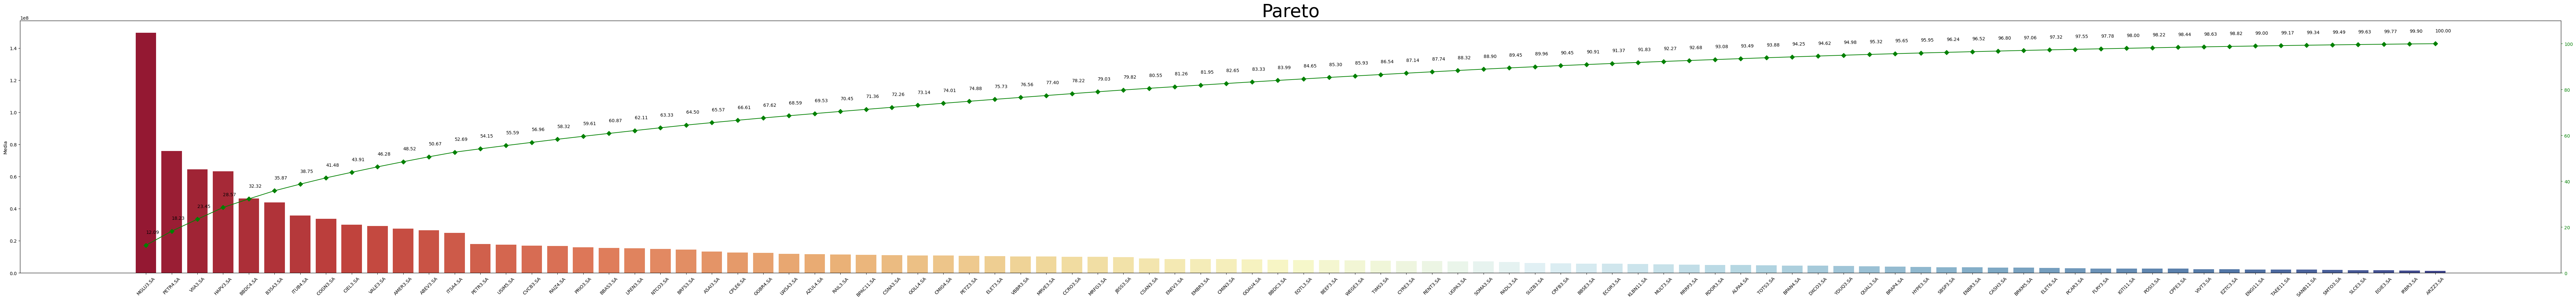

In [31]:
# Plotar gráfico de Pareto, considerando o volume médio acumulado
# Princípio de Pareto ou regra 80/20: segundo o princípio, 80% dos efeitos surgem a partir de 20% das causas
plt.figure(figsize = (100,10))
ax = sns.barplot(x=Vol_IBOV_dec.index, y=Vol_IBOV_dec['Media'], palette='RdYlBu')
ax.set_title('Pareto', fontsize=40)

ax2 = ax.twinx()

ax2.plot(Vol_IBOV_dec.index, Vol_IBOV_dec['CumPercent'], color='g', marker='D', ms = 7, label = 'Pareto')

ax2.tick_params(axis='y', colors='g')
ax2.set_ylim([0,110])

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
gap = 5
for i in range(len(Vol_IBOV_dec['CumPercent'])):
    ax2.annotate('%.2f' % Vol_IBOV_dec['CumPercent'][i], (Vol_IBOV_dec.index[i], Vol_IBOV_dec['CumPercent'][i] + gap))
    


In [32]:
# Criar no objeto com o filtro dos 20% de ativos "causas" que, teoricamente, impactam em 80% dos efeitos sobre o IBOV.

# O número filtro, nesta caso "41", corresponde ao número de ativos que, no momento da extração, 
# acumulados os respectivos volumes médios, contemplam 80% do volume bovespa.

Vol_IBOV_20 = Vol_IBOV_dec.head(41)
Vol_IBOV_20

,0,Media,Percent,CumPercent
MGLU3.SA,1.496122e+08,1.496122e+08,12.090912,12.090912
PETR4.SA,7.596795e+07,7.596795e+07,6.139352,18.230264
VIIA3.SA,6.462277e+07,6.462277e+07,5.222490,23.452754
HAPV3.SA,6.327931e+07,6.327931e+07,5.113919,28.566673
BBDC4.SA,4.638305e+07,4.638305e+07,3.748447,32.315121
B3SA3.SA,4.394494e+07,4.394494e+07,3.551412,35.866532
ITUB4.SA,3.572953e+07,3.572953e+07,2.887483,38.754015
COGN3.SA,3.374691e+07,3.374691e+07,2.727257,41.481272
CIEL3.SA,3.006097e+07,3.006097e+07,2.429378,43.910650
VALE3.SA,2.929860e+07,2.929860e+07,2.367767,46.278417


In [33]:
# Relação dos index (ativos) do Data Frame que, segundo Pareto, correspondem a 20% das causas dos efeitos sobre o IBOV.
# Utilizar ".index"
Vol_IBOV_20.index

Index(['MGLU3.SA', 'PETR4.SA', 'VIIA3.SA', 'HAPV3.SA', 'BBDC4.SA', 'B3SA3.SA',
       'ITUB4.SA', 'COGN3.SA', 'CIEL3.SA', 'VALE3.SA', 'AMER3.SA', 'ABEV3.SA',
       'ITSA4.SA', 'PETR3.SA', 'USIM5.SA', 'CVCB3.SA', 'RAIZ4.SA', 'PRIO3.SA',
       'BBAS3.SA', 'LREN3.SA', 'NTCO3.SA', 'BRFS3.SA', 'ASAI3.SA', 'CPLE6.SA',
       'GGBR4.SA', 'LWSA3.SA', 'AZUL4.SA', 'RAIL3.SA', 'BPAC11.SA', 'CSNA3.SA',
       'GOLL4.SA', 'CMIG4.SA', 'PETZ3.SA', 'ELET3.SA', 'VBBR3.SA', 'MRVE3.SA',
       'CCRO3.SA', 'MRFG3.SA', 'JBSS3.SA', 'CSAN3.SA', 'ENEV3.SA'],
      dtype='object')

In [34]:
# Criar nova lista, a partir de lista correspondente ao "index" do Data Frame "Vol_IBOV_20.index"
Lista_cor = list(Vol_IBOV_20.index)

In [35]:
# Adicionar à lista "Lista_cor" o string IBOV "^BVSP"
# Utilizar ".append()"
Lista_cor.append('^BVSP')

In [36]:
# Verificar se "^BVSP" foi adicionado
Lista_cor

['MGLU3.SA',
 'PETR4.SA',
 'VIIA3.SA',
 'HAPV3.SA',
 'BBDC4.SA',
 'B3SA3.SA',
 'ITUB4.SA',
 'COGN3.SA',
 'CIEL3.SA',
 'VALE3.SA',
 'AMER3.SA',
 'ABEV3.SA',
 'ITSA4.SA',
 'PETR3.SA',
 'USIM5.SA',
 'CVCB3.SA',
 'RAIZ4.SA',
 'PRIO3.SA',
 'BBAS3.SA',
 'LREN3.SA',
 'NTCO3.SA',
 'BRFS3.SA',
 'ASAI3.SA',
 'CPLE6.SA',
 'GGBR4.SA',
 'LWSA3.SA',
 'AZUL4.SA',
 'RAIL3.SA',
 'BPAC11.SA',
 'CSNA3.SA',
 'GOLL4.SA',
 'CMIG4.SA',
 'PETZ3.SA',
 'ELET3.SA',
 'VBBR3.SA',
 'MRVE3.SA',
 'CCRO3.SA',
 'MRFG3.SA',
 'JBSS3.SA',
 'CSAN3.SA',
 'ENEV3.SA',
 '^BVSP']

In [37]:
# Criar Data Frame "Ativos_cor" - cor = correlação - dos dados "Close" dos ativos 20% Pareto + IBOV 
Ativos_cor = yf.download(Lista_cor, start = Inicio, end = Fim, period = '1d')['Close']

[*********************100%***********************]  42 of 42 completed


In [38]:
# Verificar Data Frame criado (5 primeiras linhas utilizando ".head()")
Ativos_cor.head()

,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BRFS3.SA,CCRO3.SA,...,PETR4.SA,PETZ3.SA,PRIO3.SA,RAIL3.SA,RAIZ4.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-11 00:00:00-02:00,16.410000,10.425369,NaN,NaN,5.816666,28.480000,15.833493,NaN,45.860001,15.850000,...,15.66,NaN,0.5056,6.59,NaN,4.43,29.129999,NaN,3.50,62446.0
2017-01-12 00:00:00-02:00,16.930000,11.448599,NaN,NaN,5.970000,29.200001,16.206045,NaN,47.049999,16.160000,...,15.90,NaN,0.5040,6.89,NaN,4.54,30.070000,NaN,3.45,63954.0
2017-01-13 00:00:00-02:00,17.110001,11.583743,NaN,NaN,5.960000,28.440001,16.076687,NaN,45.790001,16.139999,...,15.68,NaN,0.5382,6.75,NaN,4.55,30.980000,NaN,3.28,63652.0
2017-01-16 00:00:00-02:00,17.049999,11.496865,NaN,NaN,5.923333,28.459999,16.107733,NaN,45.799999,15.900000,...,15.75,NaN,0.5468,6.74,NaN,4.78,31.820000,NaN,3.33,63831.0
2017-01-17 00:00:00-02:00,17.200001,11.361721,NaN,NaN,5.960000,28.920000,16.568251,NaN,46.349998,15.750000,...,15.82,NaN,0.5460,6.88,NaN,4.72,30.570000,NaN,3.33,64354.0


In [39]:
# Criar novo objeto "Ativos_corr" com a correlação entre os ativos, retirando nan´s - ".dropna()" e calculando a correlação
# com a função ".corr()"
Ativos_corr = Ativos_cor.dropna().corr()
Ativos_corr

,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BRFS3.SA,CCRO3.SA,...,PETR4.SA,PETZ3.SA,PRIO3.SA,RAIL3.SA,RAIZ4.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,^BVSP
ABEV3.SA,1.000000,0.545490,0.113644,0.584935,0.312108,-0.297062,0.447722,0.396542,0.558693,0.060282,...,0.038550,0.542670,-0.387785,0.196731,0.443520,0.399426,-0.136047,0.543381,0.649822,0.317478
AMER3.SA,0.545490,1.000000,-0.026597,0.862822,0.301450,-0.774326,0.785969,0.108741,0.928306,-0.118480,...,0.364511,0.941142,-0.825392,-0.472634,0.922526,0.913467,0.367030,0.923579,0.816740,0.249736
ASAI3.SA,0.113644,-0.026597,1.000000,-0.118082,0.028184,-0.113032,-0.052453,0.070380,-0.064517,-0.337579,...,-0.177130,-0.045848,0.208933,0.072674,-0.116769,-0.185091,0.247100,-0.048506,0.129355,0.201146
AZUL4.SA,0.584935,0.862822,-0.118082,1.000000,0.459415,-0.529029,0.684452,0.348826,0.861088,0.044796,...,0.251890,0.931841,-0.652107,-0.168318,0.870706,0.887479,0.274727,0.936595,0.888413,0.451420
B3SA3.SA,0.312108,0.301450,0.028184,0.459415,1.000000,0.167796,0.483715,0.766309,0.196794,0.393196,...,0.364633,0.318668,0.028366,0.389522,0.401046,0.296715,0.226927,0.505675,0.311913,0.891284
BBAS3.SA,-0.297062,-0.774326,-0.113032,-0.529029,0.167796,1.000000,-0.362232,0.388035,-0.708074,0.578853,...,0.079389,-0.708076,0.706610,0.732679,-0.632147,-0.706839,-0.446062,-0.572047,-0.598209,0.247234
BBDC4.SA,0.447722,0.785969,-0.052453,0.684452,0.483715,-0.362232,1.000000,0.418827,0.768273,0.328594,...,0.703636,0.690205,-0.690760,-0.176476,0.800756,0.646710,0.080558,0.778550,0.572285,0.444117
BPAC11.SA,0.396542,0.108741,0.070380,0.348826,0.766309,0.388035,0.418827,1.000000,0.100721,0.555966,...,0.317944,0.172443,0.079858,0.632504,0.236407,0.067608,-0.104764,0.345543,0.277297,0.803801
BRFS3.SA,0.558693,0.928306,-0.064517,0.861088,0.196794,-0.708074,0.768273,0.100721,1.000000,-0.050650,...,0.374182,0.903334,-0.827032,-0.395788,0.882679,0.867303,0.155671,0.869289,0.805635,0.174384
CCRO3.SA,0.060282,-0.118480,-0.337579,0.044796,0.393196,0.578853,0.328594,0.555966,-0.050650,1.000000,...,0.497098,-0.075422,-0.016892,0.517419,0.073403,-0.120305,-0.417896,0.059062,-0.136069,0.369785


In [40]:
# Criar novo objeto "Ativos_corr_dec"
# Ordenar pela coluna correspondente ao IBOV - "^BVSP" - do maior para o menor valor de correlação
# Analisar correlação dos ativos com o IBOV - coluna "^BVSP"
Ativos_corr_dec = Ativos_corr.sort_values(by = '^BVSP', ascending = False)
Ativos_corr_dec['^BVSP']

^BVSP        1.000000
B3SA3.SA     0.891284
ITSA4.SA     0.876537
ITUB4.SA     0.813151
BPAC11.SA    0.803801
COGN3.SA     0.725808
MRVE3.SA     0.572088
VBBR3.SA     0.488684
RAIL3.SA     0.486471
AZUL4.SA     0.451420
BBDC4.SA     0.444117
CSAN3.SA     0.420301
GGBR4.SA     0.398804
LREN3.SA     0.397820
LWSA3.SA     0.386024
MGLU3.SA     0.382383
GOLL4.SA     0.380476
CCRO3.SA     0.369785
VIIA3.SA     0.367275
PETR4.SA     0.363298
RAIZ4.SA     0.352334
HAPV3.SA     0.350938
NTCO3.SA     0.347125
CSNA3.SA     0.343730
PETR3.SA     0.339673
CPLE6.SA     0.318567
ABEV3.SA     0.317478
VALE3.SA     0.311926
PETZ3.SA     0.293296
USIM5.SA     0.286049
CVCB3.SA     0.272285
AMER3.SA     0.249736
BBAS3.SA     0.247234
ENEV3.SA     0.245548
CMIG4.SA     0.212672
ASAI3.SA     0.201146
ELET3.SA     0.196403
BRFS3.SA     0.174384
MRFG3.SA     0.120980
PRIO3.SA     0.111090
JBSS3.SA     0.017054
CIEL3.SA     0.011369
Name: ^BVSP, dtype: float64

In [41]:
# Criar novo objeto "Ativos_corr_IBOV" com a correlação dos ativos IBOV, a partir de coluna "^BVSP", "Ativos_corr_dec"
Ativos_corr_IBOV = Ativos_corr_dec['^BVSP']
Ativos_corr_IBOV

^BVSP        1.000000
B3SA3.SA     0.891284
ITSA4.SA     0.876537
ITUB4.SA     0.813151
BPAC11.SA    0.803801
COGN3.SA     0.725808
MRVE3.SA     0.572088
VBBR3.SA     0.488684
RAIL3.SA     0.486471
AZUL4.SA     0.451420
BBDC4.SA     0.444117
CSAN3.SA     0.420301
GGBR4.SA     0.398804
LREN3.SA     0.397820
LWSA3.SA     0.386024
MGLU3.SA     0.382383
GOLL4.SA     0.380476
CCRO3.SA     0.369785
VIIA3.SA     0.367275
PETR4.SA     0.363298
RAIZ4.SA     0.352334
HAPV3.SA     0.350938
NTCO3.SA     0.347125
CSNA3.SA     0.343730
PETR3.SA     0.339673
CPLE6.SA     0.318567
ABEV3.SA     0.317478
VALE3.SA     0.311926
PETZ3.SA     0.293296
USIM5.SA     0.286049
CVCB3.SA     0.272285
AMER3.SA     0.249736
BBAS3.SA     0.247234
ENEV3.SA     0.245548
CMIG4.SA     0.212672
ASAI3.SA     0.201146
ELET3.SA     0.196403
BRFS3.SA     0.174384
MRFG3.SA     0.120980
PRIO3.SA     0.111090
JBSS3.SA     0.017054
CIEL3.SA     0.011369
Name: ^BVSP, dtype: float64

In [42]:
# Criar objeto "Ativos_corr_IBOV" com itens com correlação acima de 0.60
Ativos_corr_IBOV = Ativos_corr_IBOV[Ativos_corr_dec['^BVSP'] > 0.60]

In [43]:
Ativos_corr_IBOV

^BVSP        1.000000
B3SA3.SA     0.891284
ITSA4.SA     0.876537
ITUB4.SA     0.813151
BPAC11.SA    0.803801
COGN3.SA     0.725808
Name: ^BVSP, dtype: float64

In [44]:
!pip install MetaTrader5
import MetaTrader5 as mt5

In [45]:
# Inicializar MT5
mt5.initialize()

True

In [46]:
# TESTE: fazer teste de listagem de informações com ativo "ABEV3"
mt5.symbol_info('ABEV3')

SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=28761, session_buy_orders=0, session_sell_orders=0, volume=100, volumehigh=2000000, volumelow=100, time=1689772657, digits=2, spread=1, spread_float=True, ticks_bookdepth=32, trade_calc_mode=32, trade_mode=4, start_time=0, expiration_time=253402300799, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=11, filling_mode=3, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=14.55, bidhigh=14.73, bidlow=14.47, ask=14.56, askhigh=14.76, asklow=14.48, last=14.55, lasthigh=14.75, lastlow=14.47, volume_real=100.0, volumehigh_real=2000000.0, volumelow_real=100.0, option_strike=0.0, point=0.01, trade_tick_value=0.01, trade_tick_value_profit=0.01, trade_tick_value_loss=0.01, trade_tick_size=0.01, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=100.0

In [47]:
# Criar objeto "lista_ativos" com os ativos, itens "index" do Data Frame "Ativos_corr_IBOV"
lista_ativos = [Ativos_corr_IBOV.index]
lista_ativos

[Index(['^BVSP', 'B3SA3.SA', 'ITSA4.SA', 'ITUB4.SA', 'BPAC11.SA', 'COGN3.SA'], dtype='object')]

In [48]:
len(lista_ativos)

1

In [49]:
# Criar novo Data Frame "Ativos_corr_IBOV_index" a partir de "Ativos_corr_IBOV"
# Criar coluna "Ativo_Corr" com os ativos listados como "index" - coluna "index"
Ativos_corr_IBOV_index = pd.DataFrame(Ativos_corr_IBOV)
Ativos_corr_IBOV_index['Ativo_Corr'] = Ativos_corr_IBOV_index.index
Ativos_corr_IBOV_index

,^BVSP,Ativo_Corr
^BVSP,1.000000,^BVSP
B3SA3.SA,0.891284,B3SA3.SA
ITSA4.SA,0.876537,ITSA4.SA
ITUB4.SA,0.813151,ITUB4.SA
BPAC11.SA,0.803801,BPAC11.SA
COGN3.SA,0.725808,COGN3.SA


Ativos_corr_IBOV_index = Ativos_corr_IBOV.index
Ativos_corr_IBOV_index = pd.DataFrame(Ativos_corr_IBOV_index)
Ativos_corr_IBOV_index

In [50]:
# Alterar objeto, retirando ".SA". Trocar ".SA" por "".
Ativos_corr_IBOV_index = Ativos_corr_IBOV_index['Ativo_Corr'].replace(to_replace = r'.SA$', value = "", regex = True)
Ativos_corr_IBOV_index = pd.DataFrame(Ativos_corr_IBOV_index)
Ativos_corr_IBOV_index

,Ativo_Corr
^BVSP,^BVSP
B3SA3.SA,B3SA3
ITSA4.SA,ITSA4
ITUB4.SA,ITUB4
BPAC11.SA,BPAC11
COGN3.SA,COGN3


In [51]:
# Criar objeto "Ativos_Analise" sem o ativo IBOV - "^BVSP"
Ativos_Analise = Ativos_corr_IBOV_index.tail(Ativos_corr_IBOV_index.shape[0]-1)
Ativos_Analise

,Ativo_Corr
B3SA3.SA,B3SA3
ITSA4.SA,ITSA4
ITUB4.SA,ITUB4
BPAC11.SA,BPAC11
COGN3.SA,COGN3


Ativos_corr_IBOV_index = Ativos_corr_IBOV_index['Ativo_Corr'].str.replace(r".SA$","")
Ativos_corr_IBOV_index = pd.DataFrame(Ativos_corr_IBOV_index)
Ativos_corr_IBOV_index

In [52]:
# Listar informações "IBOV"
mt5.symbol_info('IBOV')

SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=9069112, session_buy_orders=0, session_sell_orders=0, volume=96066935, volumehigh=182588734276, volumelow=28500, time=1689772650, digits=0, spread=0, spread_float=True, ticks_bookdepth=10, trade_calc_mode=32, trade_mode=0, start_time=0, expiration_time=253402300799, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=11, filling_mode=3, order_mode=63, order_gtc_mode=0, option_mode=0, option_right=0, bid=0.0, bidhigh=0.0, bidlow=0.0, ask=0.0, askhigh=0.0, asklow=0.0, last=116855.0, lasthigh=117929.0, lastlow=116660.0, volume_real=96066935.0, volumehigh_real=182588734276.80493, volumelow_real=28500.0, option_strike=0.0, point=1.0, trade_tick_value=1.0, trade_tick_value_profit=1.0, trade_tick_value_loss=1.0, trade_tick_size=1.0, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=

In [53]:
# Criar objeto Data Frame "info" com as informações "IBOV" 
info = pd.DataFrame(mt5.symbol_info('IBOV'))
info

,0
0,False
1,1
2,True
3,True
4,9069112
...,...
91,
92,
93,IBOV
94,


In [54]:
Info_ativos = []
Info_ativos = pd.DataFrame(Info_ativos)
for i in Ativos_Analise['Ativo_Corr']:
    Info_ativos[i] = mt5.symbol_info(i)
Info_ativos    

,B3SA3,ITSA4,ITUB4,BPAC11,COGN3
0,False,False,False,False,False
1,1,1,1,1,1
2,True,True,True,True,True
3,True,True,True,True,True
4,40094,29054,51070,35749,14153
...,...,...,...,...,...
91,,,,,
92,BRB3SAACNOR6,BRITSAACNPR7,BRITUBACNPR1,BRBPACUNT006,BRCOGNACNOR2
93,B3SA3,ITSA4,ITUB4,BPAC11,COGN3
94,,,,,


In [55]:
Info_ativos = Info_ativos.transpose()
Info_ativos

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
B3SA3,False,1,True,True,40094,0,0,100,1000000,100,...,BRL,BRL,,B3 ON NM,BVMF,,BRB3SAACNOR6,B3SA3,,BOVESPA\A VISTA\B3SA3
ITSA4,False,1,True,True,29054,0,0,200,2000000,100,...,BRL,BRL,,ITAUSA PN N1,BVMF,,BRITSAACNPR7,ITSA4,,BOVESPA\A VISTA\ITSA4
ITUB4,False,1,True,True,51070,0,0,300,2100000,100,...,BRL,BRL,,ITAUUNIBANCOPN N1,BVMF,,BRITUBACNPR1,ITUB4,,BOVESPA\A VISTA\ITUB4
BPAC11,False,1,True,True,35749,0,0,100,300000,100,...,BRL,BRL,,BTGP BANCO UNT N2,BVMF,,BRBPACUNT006,BPAC11,,BOVESPA\A VISTA\BPAC11
COGN3,False,1,True,True,14153,0,0,100,347100,100,...,BRL,BRL,,COGNA ON ON NM,BVMF,,BRCOGNACNOR2,COGN3,,BOVESPA\A VISTA\COGN3


In [56]:
# Criar objeto dicionário "IBOV_DF" com as informações "IBOV" 
IBOV_DF = mt5.symbol_info('IBOV')._asdict()
IBOV_DF

{'custom': False,
 'chart_mode': 1,
 'select': True,
 'visible': True,
 'session_deals': 9069112,
 'session_buy_orders': 0,
 'session_sell_orders': 0,
 'volume': 96066935,
 'volumehigh': 182588734276,
 'volumelow': 28500,
 'time': 1689772650,
 'digits': 0,
 'spread': 0,
 'spread_float': True,
 'ticks_bookdepth': 10,
 'trade_calc_mode': 32,
 'trade_mode': 0,
 'start_time': 0,
 'expiration_time': 253402300799,
 'trade_stops_level': 0,
 'trade_freeze_level': 0,
 'trade_exemode': 3,
 'swap_mode': 0,
 'swap_rollover3days': 3,
 'margin_hedged_use_leg': False,
 'expiration_mode': 11,
 'filling_mode': 3,
 'order_mode': 63,
 'order_gtc_mode': 0,
 'option_mode': 0,
 'option_right': 0,
 'bid': 0.0,
 'bidhigh': 0.0,
 'bidlow': 0.0,
 'ask': 0.0,
 'askhigh': 0.0,
 'asklow': 0.0,
 'last': 116855.0,
 'lasthigh': 117929.0,
 'lastlow': 116660.0,
 'volume_real': 96066935.0,
 'volumehigh_real': 182588734276.80493,
 'volumelow_real': 28500.0,
 'option_strike': 0.0,
 'point': 1.0,
 'trade_tick_value': 1.0,


In [57]:
# Criar novo objeto "tabela_IBOV" com as informações dicionário "IBOV_DF", criando as colunas "categoria" e "valor"
tabela_IBOV = pd.DataFrame(list(IBOV_DF.items()),columns = ['categoria', 'valor'])
tabela_IBOV.head(20)

,categoria,valor
0,custom,False
1,chart_mode,1
2,select,True
3,visible,True
4,session_deals,9069112
5,session_buy_orders,0
6,session_sell_orders,0
7,volume,96066935
8,volumehigh,182588734276
9,volumelow,28500


In [58]:
# Criar Data Frame "df_ativos_analise" com as informações de todos os ativos listados 20% Pareto
df_ativos_analise = pd.DataFrame()
for i in Ativos_Analise['Ativo_Corr']:
    df_ativos_dic = mt5.symbol_info(i)._asdict()
    df_ativos = pd.DataFrame(list(df_ativos_dic.items()),columns = ['categoria', i])
    df_ativos.set_index('categoria', inplace = True)
    df_ativos_analise[i] = df_ativos[i]
    
df_ativos_analise

,B3SA3,ITSA4,ITUB4,BPAC11,COGN3
categoria,,,,,
custom,False,False,False,False,False
chart_mode,1,1,1,1,1
select,True,True,True,True,True
visible,True,True,True,True,True
session_deals,40094,29054,51070,35749,14153
...,...,...,...,...,...
formula,,,,,
isin,BRB3SAACNOR6,BRITSAACNPR7,BRITUBACNPR1,BRBPACUNT006,BRCOGNACNOR2
name,B3SA3,ITSA4,ITUB4,BPAC11,COGN3


In [59]:
# Criar objeto "df_ativos_trans" com a transposição do Data Frame "df_ativos_analise"
# Filtrar colunas
df_ativos_trans = df_ativos_analise.transpose()
df_ativos_trans[['price_change',
                 'price_volatility',
                 'bid','ask','last',
                 'session_aw',
                 'session_open',
                 'lasthigh',
                 'lastlow',
                 'session_close',
                 'description']]

categoria,price_change,price_volatility,bid,ask,last,session_aw,session_open,lasthigh,lastlow,session_close,description
B3SA3,-1.4276,0.0,14.5,14.51,14.5,14.58,14.75,14.76,14.46,14.71,B3 ON NM
ITSA4,-1.0256,0.0,9.65,9.67,9.65,9.69,9.7,9.78,9.58,9.75,ITAUSA PN N1
ITUB4,-1.0612,0.0,27.96,27.98,27.97,28.08,28.27,28.41,27.89,28.27,ITAUUNIBANCOPN N1
BPAC11,-1.6832,0.0,32.71,32.72,32.71,32.91,33.3,33.3,32.65,33.27,BTGP BANCO UNT N2
COGN3,1.5106,0.0,3.36,3.37,3.36,3.37,3.32,3.42,3.3,3.31,COGNA ON ON NM


In [60]:
# CONCATENAÇÃO DOS DOIS CÓDIGOS/PASSOS ANTERIORES
# Criar Data Frame "df_ativos_analise" com as informações de todos os ativos listados 20% Pareto
# Criar objeto "df_ativos_trans" com a transposição do Data Frame "df_ativos_analise"
# Filtrar colunas
df_ativos_analise = pd.DataFrame()
for i in Ativos_Analise['Ativo_Corr']:
    df_ativos_dic = mt5.symbol_info(i)._asdict()
    df_ativos = pd.DataFrame(list(df_ativos_dic.items()),columns = ['categoria', i])
    df_ativos.set_index('categoria', inplace = True)
    df_ativos_analise[i] = df_ativos[i]

df_ativos_trans = df_ativos_analise.transpose()
df_ativos_trans[['price_change',
                 'price_volatility',
                 'bid','ask','last',
                 'session_aw',
                 'session_open',
                 'lasthigh',
                 'lastlow',
                 'session_close',
                 'description']]

categoria,price_change,price_volatility,bid,ask,last,session_aw,session_open,lasthigh,lastlow,session_close,description
B3SA3,-1.4276,0.0,14.5,14.51,14.5,14.58,14.75,14.76,14.46,14.71,B3 ON NM
ITSA4,-1.0256,0.0,9.65,9.67,9.65,9.69,9.7,9.78,9.58,9.75,ITAUSA PN N1
ITUB4,-1.0612,0.0,27.96,27.98,27.97,28.08,28.27,28.41,27.89,28.27,ITAUUNIBANCOPN N1
BPAC11,-1.6832,0.0,32.71,32.72,32.71,32.91,33.3,33.3,32.65,33.27,BTGP BANCO UNT N2
COGN3,1.5106,0.0,3.36,3.37,3.36,3.37,3.32,3.42,3.3,3.31,COGNA ON ON NM


In [61]:
Ativos_Analise_lista = list(Ativos_Analise['Ativo_Corr'])
Ativos_Analise_lista

['B3SA3', 'ITSA4', 'ITUB4', 'BPAC11', 'COGN3']